## **Regresión Softmax: Explicación Teórica**

La **regresión Softmax** es una generalización de la regresión logística para problemas de clasificación multiclase. Mientras que la regresión logística se usa para clasificar entre dos clases (0 y 1), la regresión Softmax permite clasificar entre múltiples clases modelando probabilidades para cada una de ellas.

---

## **1. Origen: Generalización de la Regresión Logística**

En regresión logística binaria, modelamos la probabilidad de que una instancia $\mathbf{x}$ pertenezca a la clase $y = 1$ usando la función sigmoide:

$$
P(y = 1 | \mathbf{x}) = \frac{1}{1 + \exp(- (\mathbf{w} \cdot \mathbf{x} + b))}
$$

Para clasificación multiclase, necesitamos una función que asigne probabilidades a **múltiples clases** en lugar de solo una. Esto se logra con la **función Softmax**.

---

## **2. Definición de la Función Softmax**

La función Softmax convierte los logits (salidas de la función lineal) en probabilidades:

$$
P(y = k | \mathbf{x}) = \frac{\exp(\mathbf{w}_k \cdot \mathbf{x} + b_k)}{\sum_{j=1}^{K} \exp(\mathbf{w}_j \cdot \mathbf{x} + b_j)}
$$

### **¿Qué significa esta ecuación?**
- Para cada clase $k$, calculamos un **logit** con su propio vector de pesos $\mathbf{w}_k$ y bias $b_k$.
- Aplicamos la función exponencial para mantener las probabilidades **siempre positivas**.
- Normalizamos dividiendo entre la suma de todas las exponenciales, asegurando que las probabilidades sumen 1.

#### **Ejemplo Numérico**
Si tenemos 3 clases y logits calculados como:
$$
z_1 = 2.0, \quad z_2 = 1.0, \quad z_3 = -1.0
$$
Aplicamos Softmax:
$$
P(y=1) = \frac{e^2}{e^2 + e^1 + e^{-1}} = 0.72
$$
$$
P(y=2) = \frac{e^1}{e^2 + e^1 + e^{-1}} = 0.26
$$
$$
P(y=3) = \frac{e^{-1}}{e^2 + e^1 + e^{-1}} = 0.04
$$
Esto indica que la clase 1 es la más probable.

---

## **3. Función de Pérdida: Entropía Cruzada**

Para entrenar el modelo, usamos la **entropía cruzada**:

$$
L = -\sum_{i=1}^{N} \sum_{k=1}^{K} \mathbb{1}(y_i = k) \log P(y_i = k | \mathbf{x}_i)
$$

### **¿Qué significa esta ecuación?**
- Es una suma sobre todas las muestras ($N$) y todas las clases ($K$).
- $\mathbb{1}(y_i = k)$ es 1 si la clase correcta es $k$, y 0 en caso contrario.
- Penaliza predicciones erróneas con mayor intensidad.

---

## **4. Gradiente Descendente: Cómo se Ajustan los Pesos**

Para minimizar la pérdida, calculamos el gradiente de $L$ respecto a los pesos de la clase $k$:

$$
\frac{\partial L}{\partial \mathbf{w}_k} = \sum_{i=1}^{N} \left(P(y_i = k | \mathbf{x}_i) - \mathbb{1}(y_i = k)\right) \mathbf{x}_i
$$

**Actualización de pesos con descenso en gradiente:**
$$
\mathbf{w}_k \leftarrow \mathbf{w}_k - \eta \frac{\partial L}{\partial \mathbf{w}_k}
$$

Donde $\eta$ es la **tasa de aprendizaje**.

### **¿Cómo interpretamos el gradiente?**
- Si la predicción $P(y_i = k)$ es **mayor** que la etiqueta real, reducimos $\mathbf{w}_k$.
- Si es **menor**, aumentamos $\mathbf{w}_k$.

Esto ajusta el modelo para mejorar la clasificación en cada iteración.


Época 0, Pérdida: 1.0959
Época 50, Pérdida: 0.1256
Época 100, Pérdida: 0.0788
Época 150, Pérdida: 0.0600
Época 200, Pérdida: 0.0494
Época 250, Pérdida: 0.0424
Época 300, Pérdida: 0.0374
Época 350, Pérdida: 0.0336
Época 400, Pérdida: 0.0306
Época 450, Pérdida: 0.0281


/Users/antoniomanguart/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


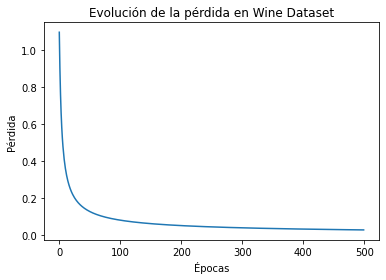

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd 

# Cargar el dataset Wine
data = load_wine()
X = data.data
y = data.target

# Crear un DataFrame con nombres de columnas
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y  # Agregar la columna de la clase

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(df)

# One-hot encoding de las etiquetas
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Inicialización de pesos y bias
np.random.seed(42)
W = np.random.randn(X.shape[1], y_one_hot.shape[1]) * 0.01
b = np.zeros((1, y_one_hot.shape[1]))

# Función Softmax
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Parámetros del entrenamiento
lr = 0.1
num_epochs = 500
loss_history = []

# Gradiente Descendente
for epoch in range(num_epochs):
    logits = np.dot(X_train, W) + b
    y_pred = softmax(logits)
    
    dW = np.dot(X_train.T, (y_pred - y_train)) / len(X_train)
    db = np.sum(y_pred - y_train, axis=0, keepdims=True) / len(X_train)
    
    W -= lr * dW
    b -= lr * db
    
    loss = -np.sum(y_train * np.log(y_pred + 1e-9)) / len(X_train)
    loss_history.append(loss)
    
    if epoch % 50 == 0:
        print(f"Época {epoch}, Pérdida: {loss:.4f}")

# Gráfica de la función de pérdida
plt.plot(loss_history)
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida en Wine Dataset")
plt.show()

#### Ahora con sklearn


In [2]:
from sklearn import linear_model

target = 'target'

X = df.drop(target, axis=1)

# Normalizar las características
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Crear y entrenar el modelo de Regresión Logística Multiclase (Softmax)


In [3]:
from sklearn.metrics import accuracy_score

In [4]:
# Dataset de coeficientes
